# Topic Modelling on News Groups Dataset using LDA

`fetch_20newsgroups` is a function which is present in scikit learn datasets

**newsgroups_train and newsgroups_test contains train and test data respectively**

In [1]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', shuffle = True,random_state=42, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', shuffle = True,random_state=42, remove=('headers', 'footers', 'quotes'))

In [2]:
#initializing documents an array which contains the training data
documents=newsgroups_train.data
documents[0:5]

['I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.',
 "A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't an

In [3]:
#checking the target names for the respective documents
print(list(newsgroups_train.target_names))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


**Basic Preprocessing using Regular Expressions**

In [4]:
import re
sentences=[]
for i in documents:
    #x =str(i, 'utf-8')
    sentences.append(' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(\n)"," ",i).split()))

In [5]:
#printing to see how the training set is transformed using Regular Expressions
print(documents[0])
print(sentences[0])

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.
I was wondering if anyone out there could enlighten me on this car I saw the other day It was a 2 door sports car looked to be from the late 60s early 70s It was called a Bricklin The doors were really small In addition the front bumper was separate from the rest of the body This is all I know If anyone can tellme a model name engine specs years of production where this car is made history or whatever info you have on this funky looking car please e mail


**Pre-Processing text using Stop-Word Removal, Tokenization and Lemmatization**

In [6]:
#tqdm is used to report the status of loop
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from tqdm import tqdm
out_arr=[]
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
for sent in tqdm(sentences):
    data = sent.split()
    inn_arr=[]
    for i in data:
        if i not in stop_words:
            inn_arr.append((lemmatizer.lemmatize(i.lower())))
    out_arr.append(inn_arr)
print(out_arr)

100%|██████████████████████████████████████████████████████████████████████████| 11314/11314 [00:08<00:00, 1360.44it/s]
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
print(documents[0])
print(out_arr[0])

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.
['i', 'wondering', 'anyone', 'could', 'enlighten', 'car', 'i', 'saw', 'day', 'it', '2', 'door', 'sport', 'car', 'looked', 'late', '60', 'early', '70', 'it', 'called', 'bricklin', 'the', 'door', 'really', 'small', 'in', 'addition', 'front', 'bumper', 'separate', 'rest', 'body', 'this', 'i', 'know', 'if', 'anyone', 'tellme', 'model', 'name', 'engine', 'spec', 'year', 'production', 'car', 'made', 'history', 'whatever', 'info', 'funky', 'looking', 'car', 'please', 'e', 'mail']


**Creating Dictionary and Corpora using gensim for LDA implementation**

In [8]:
from gensim import corpora
dictionary = corpora.Dictionary(out_arr)
corpus = [dictionary.doc2bow(text) for text in out_arr]

In [9]:
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [10]:
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
lda=ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.039*"m" + 0.023*"w" + 0.018*"s" + 0.016*"1" + 0.014*"x" + 0.014*"g"')
(1, '0.031*"i" + 0.012*"the" + 0.006*"would" + 0.006*"one" + 0.004*"get" + 0.004*"like"')
(2, '0.033*"i" + 0.008*"the" + 0.007*"people" + 0.007*"god" + 0.007*"one" + 0.006*"would"')
(3, '0.027*"1" + 0.026*"0" + 0.017*"2" + 0.012*"3" + 0.009*"4" + 0.009*"x"')
(4, '0.418*"ax" + 0.031*"max" + 0.024*"x" + 0.024*"q" + 0.019*"3" + 0.011*"p"')


In [11]:
#pip install pyLDAvis

**Code to indicate word counts of topic keywords**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in out_arr for w in w_list]
counter = Counter(data_flat)
topics = ldamodel.show_topics(formatted=False)
out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

<Figure size 2560x1600 with 8 Axes>

In [13]:
def compute_coherence_values(dictionary, corpus, texts, stop, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        print('Calculating {}-topic model'.format(num_topics))
        ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
        model_list.append(ldamodel)
        coherencemodel = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [14]:
from gensim.models import CoherenceModel
start=5; stop=7; step=1;
stop += 1
model_list, coherence_values = compute_coherence_values(dictionary=dictionary,
                                                        corpus=corpus,
                                                        texts=out_arr,
                                                        start=start,
                                                        stop=stop,
                                                        step=step)

Calculating 5-topic model
Calculating 6-topic model
Calculating 7-topic model


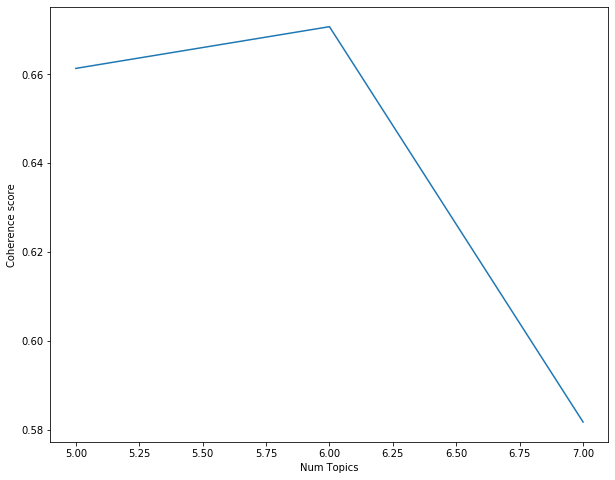

In [15]:
import matplotlib.pyplot as plt
x = range(start, stop, step)
plt.figure(figsize=(10, 8))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
# plt.legend(("coherence_values"), loc='best')
plt.show()

In [16]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary=ldamodel.id2word)
vis

C:\Users\FF733YY\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.255787  0.014153       1        1  44.824524
2     -0.254079  0.126904       2        1  19.665817
3     -0.015632 -0.245500       3        1  18.156199
4      0.284119  0.159481       4        1   8.752985
0      0.241379 -0.055038       5        1   8.600473, topic_info=     Category          Freq Term         Total  loglift  logprob
6165  Default  57266.000000   ax  57266.000000  30.0000  30.0000
2487  Default   6845.000000    m   6845.000000  29.0000  29.0000
48    Default  11217.000000    1  11217.000000  28.0000  28.0000
317   Default   9078.000000    0   9078.000000  27.0000  27.0000
2279  Default   4286.000000  max   4286.000000  26.0000  26.0000
...       ...           ...  ...           ...      ...      ...
826    Topic5   1133.014038    5   4420.844238   1.0919  -4.7771
317    Topic5   1468.641113    0   9078.302734   0.6318  -4.5176
20     Topic5   1642.103882    i  34538.292969  -0.5927  -4.4060
51     Topic5   1183.398926    a   5836.289551   0.8576  -4.7336
0      Topic5   1224.500244    2   8041.606445   0.5713  -4.6994

[393 rows x 6 columns], token_table=       Topic      Freq Term
term                       
317        3  0.809072    0
317        4  0.029080    0
317        5  0.161814    0
2635       1  0.047780   00
2635       3  0.940619   00
...      ...       ...  ...
287        3  0.069600  you
15924      5  0.988782   yx
3051       3  0.116671    z
3051       4  0.125486    z
3051       5  0.757064    z

[678 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 5, 1])